<div style="text-align:center;">
  <span style="color:#962323; font-size:45px; font-weight:bold; font-family:Arial;">Insurance</span>
</div>

### <span style="color:#800080; font-style:italic; font-family:Arial;">General import</span>

In [3]:
ON_KAGGLE = False

In [15]:
if ON_KAGGLE:
    !pip install seaborn --upgrade --quiet
else:
    import sys
    sys.path.append('..')
    %load_ext autoreload
    %autoreload 2

import os

import utilities

from tqdm import tqdm

import pandas as pd
import matplotlib.pyplot as plt

train_path = 'train.csv' if not ON_KAGGLE else ''
test_path  = 'test.csv' if not ON_KAGGLE else ''

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)

df_train.drop(columns=['id'], inplace=True)
df_test.drop(columns=['id'], inplace=True)

assert not df_train.empty
assert not df_test.empty
assert df_train.columns[:-1].equals(df_test.columns)

In [6]:
print('_______Train_______')
df_train.head(3)

_______Train_______


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0


In [7]:
print('_______Test_______')
df_test.head(3)

_______Test_______


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271


In [8]:
# We check the data types of the columns
pd.DataFrame(df_train.dtypes, columns=['Data Type']).T

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Data Type,object,int64,int64,float64,int64,object,object,float64,float64,int64,int64


In [9]:
df_train.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [10]:
df_test.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06
mean,3.839137e+01,9.980208e-01,2.642661e+01,4.630772e-01,3.046553e+04,1.123650e+02,1.638996e+02
std,1.499951e+01,4.444387e-02,1.299433e+01,4.986349e-01,1.644586e+04,5.407358e+01,7.998445e+01
min,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01
25%,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.528000e+04,2.900000e+01,9.900000e+01
50%,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182700e+04,1.510000e+02,1.660000e+02
75%,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.946000e+04,1.520000e+02,2.320000e+02
max,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02


In [11]:
# We check for missing values
nan_train = pd.DataFrame(df_train.isnull().sum()).T
nan_train.index = ['Train']
nan_test  = pd.DataFrame(df_test.isnull().sum()).T
nan_test.index = ['Test']
pd.concat([nan_train, nan_test], axis=0)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Train,0,0,0,0,0,0,0,0,0,0,0.0
Test,0,0,0,0,0,0,0,0,0,0,NaN


,Labels,Counts,Percentages
0,0,10089739,87.700271
1,1,1415059,12.299729


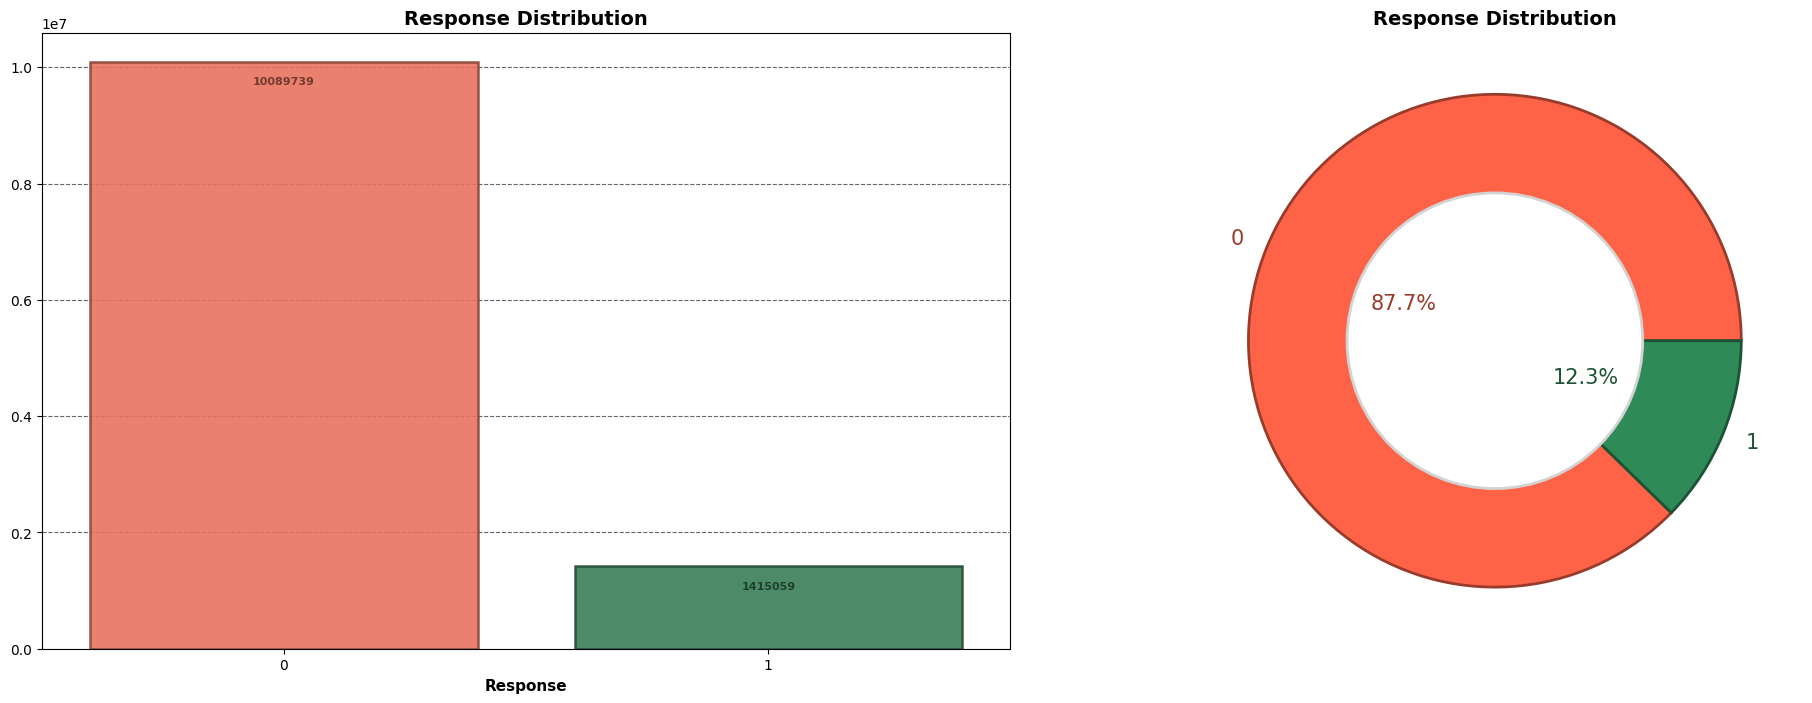

In [12]:
plt.figure(figsize=(25, 8))
plt.subplots_adjust(wspace=0, hspace=0.1)
ax = plt.subplot(121)
utilities.plot_hist_discrete_feature(ax, df_train, 'Response', 
                                     color=['tomato', 'seagreen'],
                                     title='Response Distribution')

ax = plt.subplot(122)
utilities.plot_pie_feature(ax, df_train, 'Response', color=['tomato', 'seagreen'], 
                           annot_fontsize=15, donnut_style=True, linewidth=2,
                           donnut_size=0.6, annot_distance=0.4,
                           title='Response Distribution')

The Target column seems to have a `class imbalance`. We'll certainly need to address this later on with the [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) (*S*ynthetic *M*inority *O*versampling *TE*chnique) strategy (oversampling) or an undersampling strategy.

Plotting KDEs: 100%|██████████| 5/5 [00:00<00:00, 21.89it/s]

15
15
15
15
15


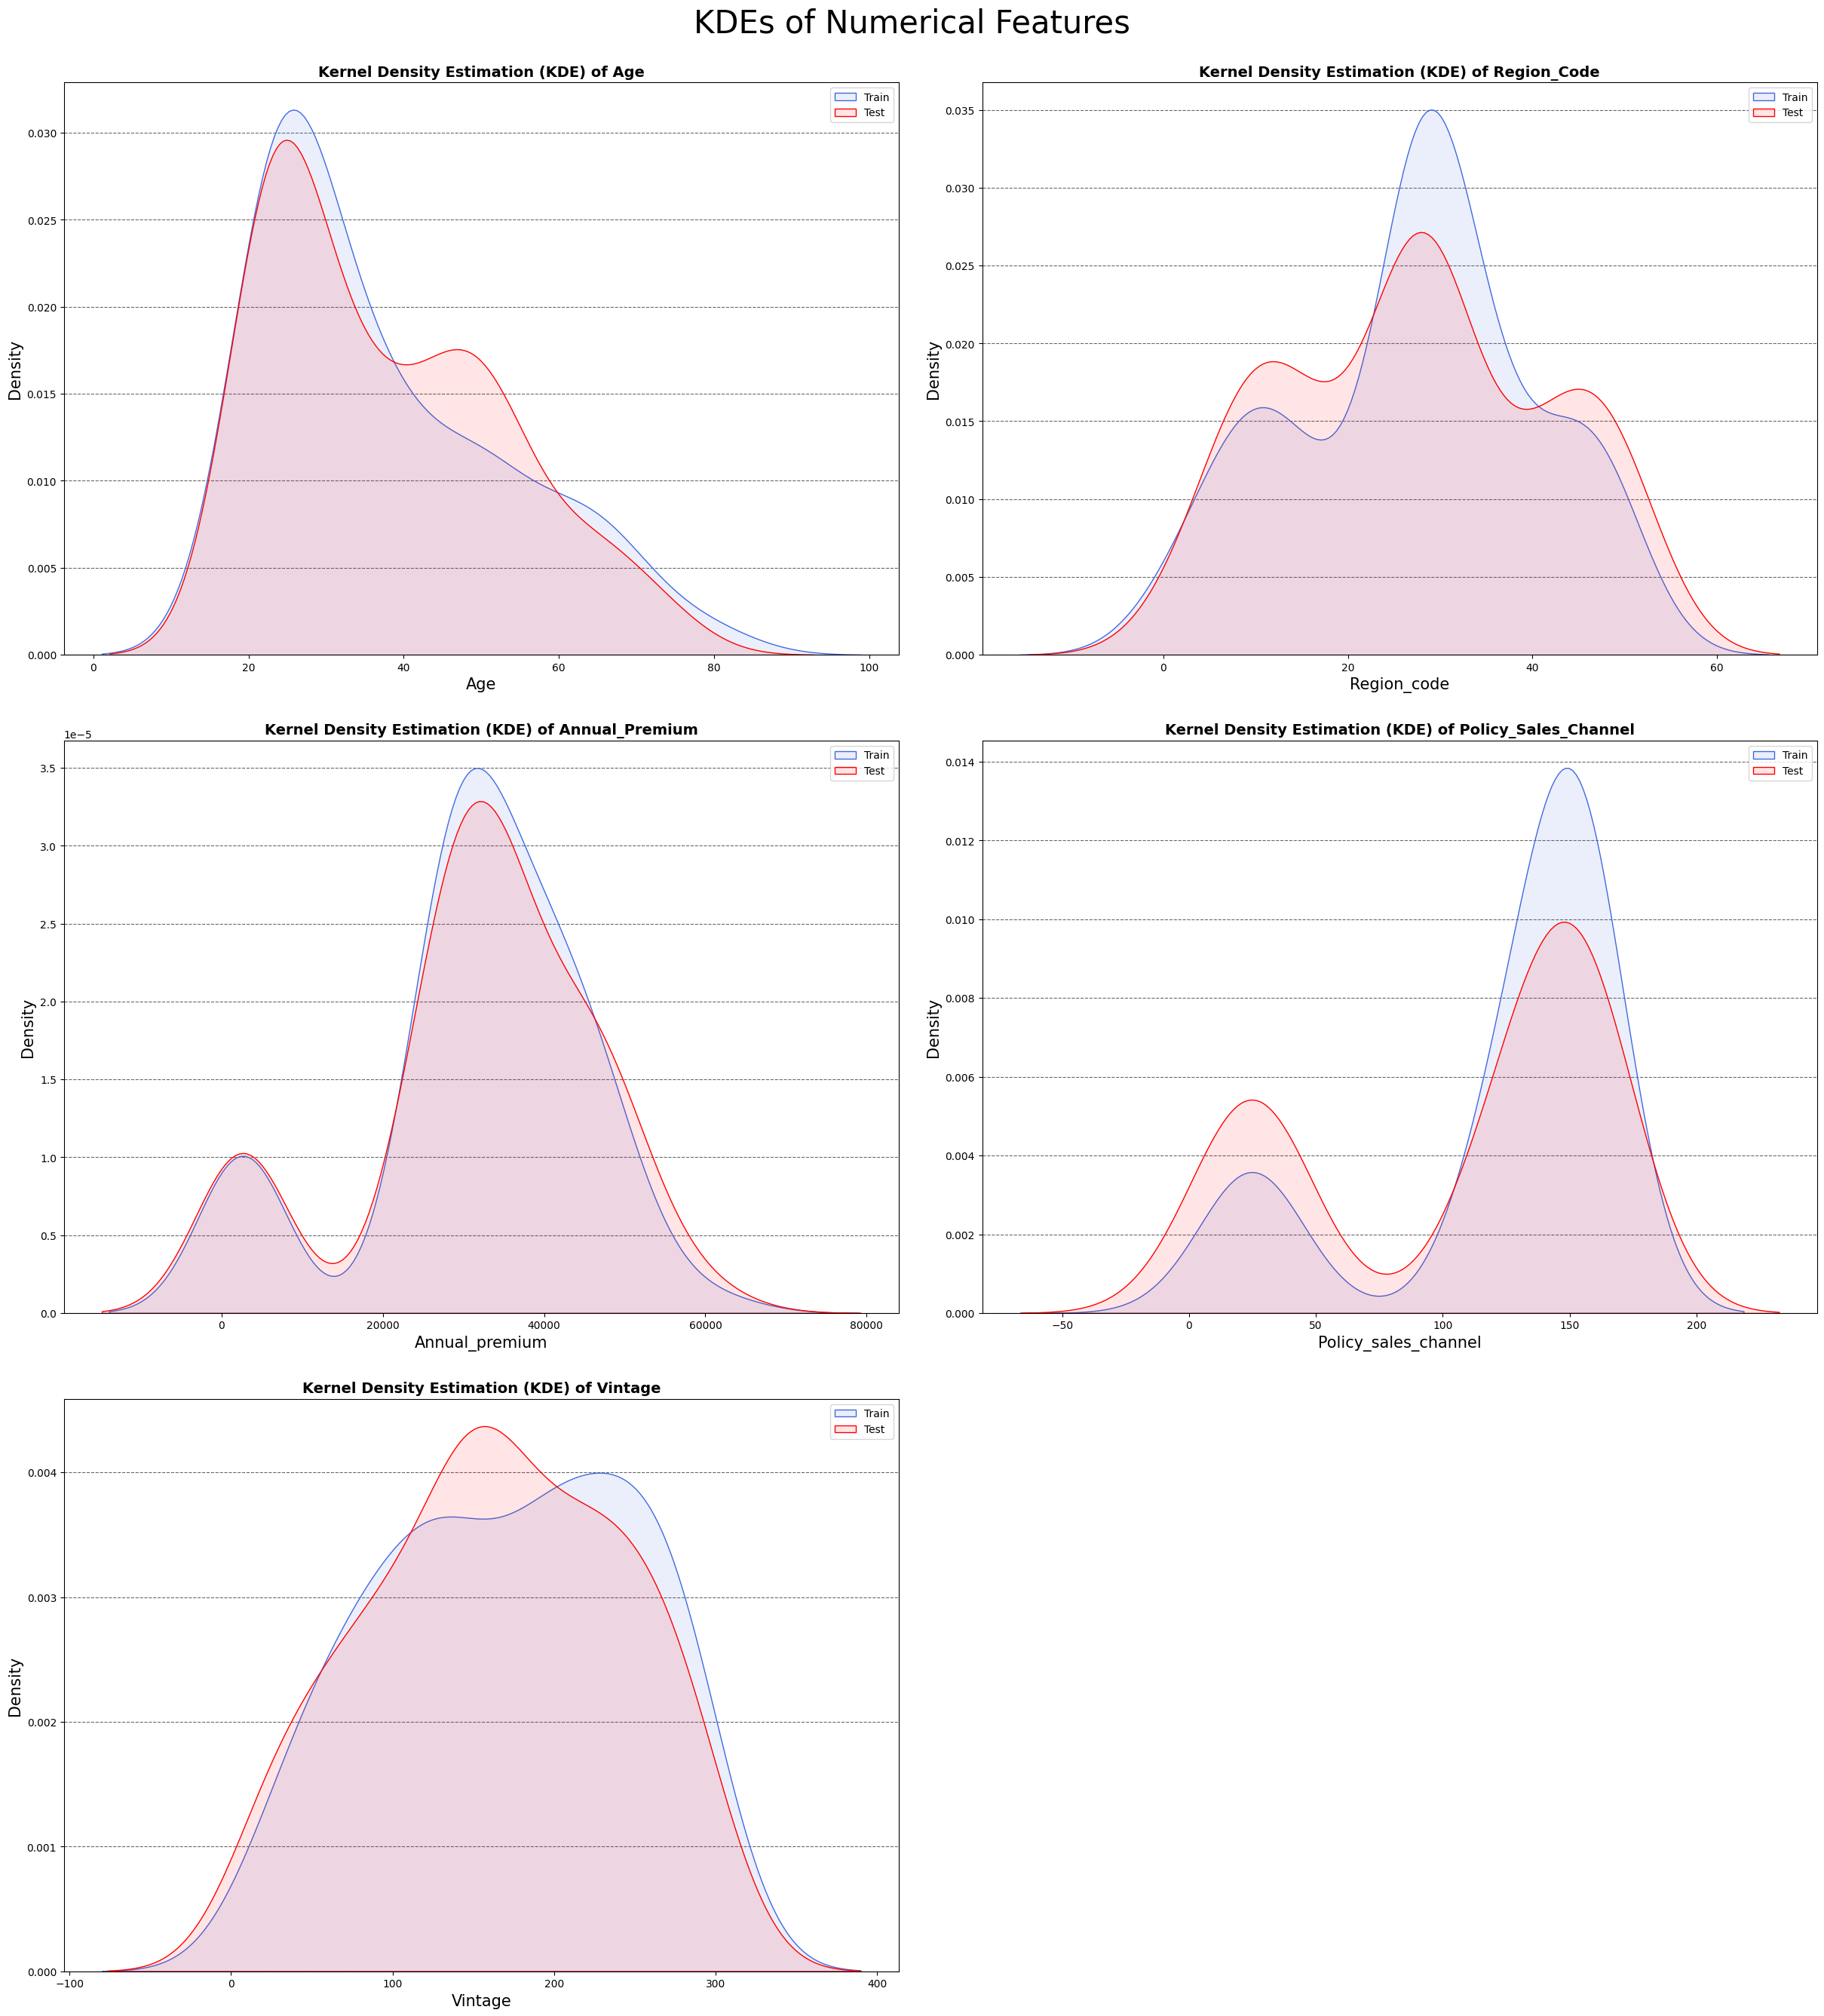

In [36]:
# For all the features we plot the KDE
numerical_features = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

image_path = 'numerical_features.png' if not ON_KAGGLE else '/kaggle/working/numerical_features.png'

if os.path.exists(image_path):
    plt.figure(figsize=(30, 50))
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
else:
    plt.figure(figsize=(30, 50))
    plt.suptitle('KDEs of Numerical Features', fontsize=30)
    plt.subplots_adjust(top=0.96)
    
    plt.subplots_adjust(wspace=0.1, hspace=0.15)
    for i, feature in enumerate(tqdm(numerical_features, desc="Plotting KDEs")):
        ax = plt.subplot(5, 2, i + 1)
        utilities.plot_kde(ax, [df_train, df_test], column=feature, 
                           color=['royalblue', 'red'], labels=['Train', 'Test'], 
                           fill=True, alpha=0.1, x_label_fontsize=15, y_label_fontsize=15,
                           x_label_bold=False, y_label_bold=False)
    plt.savefig(image_path, bbox_inches='tight')
    plt.show()